# IBM Data Science Capstone

### Question 3: Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

Here we analyze which are the main characteristics from each building or houses within Bronx that respond the most to our select Heat/Hot Water complaints.

In [3]:
#Create connection and import data
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

client_cred = ibm_boto3.client(service_name='s3',
ibm_api_key_id='*****',
ibm_auth_endpoint='https://iam.bluemix.net/oidc/token',
config=Config(signature_version='oauth'),
endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
bucket = '*****'


#download pkl to df
client_cred.download_file(Bucket=bucket,Key='df_cos_311.pkl',Filename='./df311.pkl')
df311 = pd.read_pickle('./df311.pkl')




#Import PLUTO dataset


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_25df3c37ed4849389dcdd4dd39482a29 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='*****',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_25df3c37ed4849389dcdd4dd39482a29.get_object(Bucket='****',Key='pluto_18v2_1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)




/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
a="borough,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord"
a=a.lower()
cols=a.split(",")
df=df[cols]

In [5]:
#Show PLUTO dataset
df=df[df["borough"]=="BX"]
df.head()

,borough,address,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,...,numfloors,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode,ycoord,xcoord
0,BX,CITY ISLAND AVENUE,0.0,0.0,0.00,0.0,0.0,670.0,53758.0,219.00,...,0.0,NaN,NaN,0.00,NaN,0.0,0.0,NaN,246734.0,1044510.0
2,BX,SEMINOLE AVENUE,0.0,0.0,0.00,0.0,2.0,41.0,2369.0,95.06,...,0.0,NaN,NaN,0.90,NaN,0.0,0.0,NaN,249922.0,1026345.0
3,BX,EAST 156 STREET,0.0,0.0,0.00,0.0,4.8,14.0,3750.0,100.00,...,0.0,NaN,NaN,2.43,NaN,0.0,0.0,NaN,238351.0,1007336.0
6,BX,5102 POST ROAD,3738.0,59.0,0.49,0.0,2.0,1502.0,7619.0,101.58,...,3.0,0.0,3738.0,0.90,0.0,2005.0,0.0,10471.0,265726.0,1012526.0
21,BX,988 PIERCE AVENUE,1598.0,39.0,0.64,0.0,2.0,7.0,2500.0,100.00,...,2.0,0.0,1598.0,0.90,0.0,1920.0,0.0,10462.0,247039.0,1024680.0


In [6]:
df.isna().sum()

borough          0
address         80
bldgarea        65
bldgdepth       71
builtfar       321
commfar         65
facilfar        65
lot              0
lotarea         71
lotdepth       189
numbldgs        71
numfloors       71
officearea    7301
resarea       7301
residfar        65
retailarea    7301
yearbuilt       65
yearalter1      65
zipcode       2526
ycoord         162
xcoord         162
dtype: int64

The officearea, resarea and retailarea NAs are going to be replaced by 0s as per the variables dictionary a value of 0 (or missing) mean that there is no area available or it doesn't apply, and we want to consider this. The following NA is the zipcode. The rest of NAs will be deleted as they mean less than 3% of the total dataset.

In [7]:
df[["officearea","resarea","retailarea"]].fillna(0,inplace=True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isna().sum()

borough       0
address       0
bldgarea      0
bldgdepth     0
builtfar      0
commfar       0
facilfar      0
lot           0
lotarea       0
lotdepth      0
numbldgs      0
numfloors     0
officearea    0
resarea       0
residfar      0
retailarea    0
yearbuilt     0
yearalter1    0
zipcode       0
ycoord        0
xcoord        0
dtype: int64

In [10]:
df.rename(columns={"address":"street_name"},inplace=True)

In [11]:
df.set_index("street_name",inplace=True)
df311.set_index("incident_address",inplace=True)

In [12]:
#Filtering PLUTO dataset by Bronx burough
df311 = df311[df311["borough"]=="BRONX"]
df311.head()

,created_date,unique_key,complaint_type,incident_zip,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
incident_address,,,,,,,,,,,,,,
439 EAST 135 STREET,2016-09-22 15:04:59,34379006,DOOR/WINDOW,10454,EAST 135 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.806750,-73.923258,2016-10-11 10:23:06,RESIDENTIAL BUILDING,Closed
3114 BAILEY AVENUE,2016-09-22 10:58:16,34379017,UNSANITARY CONDITION,10463,BAILEY AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.878393,-73.902086,2016-09-27 11:10:56,RESIDENTIAL BUILDING,Closed
3141 KINGSBRIDGE TERRACE,2016-09-22 11:52:26,34379032,DOOR/WINDOW,10463,KINGSBRIDGE TERRACE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.878127,-73.899360,2016-10-07 09:03:53,RESIDENTIAL BUILDING,Closed
874 LONGWOOD AVENUE,2016-09-22 13:20:17,34379033,DOOR/WINDOW,10459,LONGWOOD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.819054,-73.900826,2016-09-27 14:46:59,RESIDENTIAL BUILDING,Closed
985 SIMPSON STREET,2016-09-22 14:45:40,34379358,APPLIANCE,10459,SIMPSON STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.821868,-73.892880,2016-09-27 14:47:02,RESIDENTIAL BUILDING,Closed


In [13]:
#Merge 311 and PLUTO datasets by Street address
merge = df311.join(df,how="left",lsuffix="m_",rsuffix="_v")

In [14]:
merge.isna().sum()

created_date                  0
unique_key                    0
complaint_type                0
incident_zip                  0
street_name                   0
address_type                  0
city                          0
resolution_description        3
boroughm_                     0
latitude                      0
longitude                     0
closed_date                 530
location_type                 0
status                        0
borough_v                 85224
bldgarea                  85224
bldgdepth                 85224
builtfar                  85224
commfar                   85224
facilfar                  85224
lot                       85224
lotarea                   85224
lotdepth                  85224
numbldgs                  85224
numfloors                 85224
officearea                85224
resarea                   85224
residfar                  85224
retailarea                85224
yearbuilt                 85224
yearalter1                85224
zipcode 

The missing values from the columns from the PLUTO dataset need to be removed

In [15]:
cols = list(merge.columns[14:])
merge.dropna(subset=cols,axis=0,inplace=True)
merge.dropna(subset=["resolution_description","closed_date"],inplace=True)

In [16]:
merge.isna().sum()

created_date              0
unique_key                0
complaint_type            0
incident_zip              0
street_name               0
address_type              0
city                      0
resolution_description    0
boroughm_                 0
latitude                  0
longitude                 0
closed_date               0
location_type             0
status                    0
borough_v                 0
bldgarea                  0
bldgdepth                 0
builtfar                  0
commfar                   0
facilfar                  0
lot                       0
lotarea                   0
lotdepth                  0
numbldgs                  0
numfloors                 0
officearea                0
resarea                   0
residfar                  0
retailarea                0
yearbuilt                 0
yearalter1                0
zipcode                   0
ycoord                    0
xcoord                    0
dtype: int64

In [17]:
merge.reset_index(inplace=True)
merge.head()

,index,created_date,unique_key,complaint_type,incident_zip,street_name,address_type,city,resolution_description,boroughm_,...,numfloors,officearea,resarea,residfar,retailarea,yearbuilt,yearalter1,zipcode,ycoord,xcoord
0,1 DOROTHEA PLACE,2018-02-02 14:46:11,38374779,HEAT/HOT WATER,10458,DOROTHEA PLACE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,...,2.5,0.0,2395.0,0.90,0.0,1920.0,0.0,10458.0,253669.0,1014235.0
1,1 EAST 198 STREET,2017-07-26 13:34:39,36789719,PAINT/PLASTER,10468,EAST 198 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,...,6.0,0.0,56462.0,6.02,2500.0,1941.0,0.0,10468.0,256755.0,1013989.0
2,1 EAST 198 STREET,2017-07-26 13:34:39,36792378,WATER LEAK,10468,EAST 198 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,...,6.0,0.0,56462.0,6.02,2500.0,1941.0,0.0,10468.0,256755.0,1013989.0
3,1 EAST 198 STREET,2017-10-21 16:19:56,37485137,PAINT/PLASTER,10468,EAST 198 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,...,6.0,0.0,56462.0,6.02,2500.0,1941.0,0.0,10468.0,256755.0,1013989.0
4,1 EAST 198 STREET,2018-01-11 12:42:11,38196792,PLUMBING,10468,EAST 198 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,...,6.0,0.0,56462.0,6.02,2500.0,1941.0,0.0,10468.0,256755.0,1013989.0


In [18]:
merge.columns

Index(['index', 'created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'street_name', 'address_type', 'city', 'resolution_description',
       'boroughm_', 'latitude', 'longitude', 'closed_date', 'location_type',
       'status', 'borough_v', 'bldgarea', 'bldgdepth', 'builtfar', 'commfar',
       'facilfar', 'lot', 'lotarea', 'lotdepth', 'numbldgs', 'numfloors',
       'officearea', 'resarea', 'residfar', 'retailarea', 'yearbuilt',
       'yearalter1', 'zipcode', 'ycoord', 'xcoord'],
      dtype='object')

In [19]:
merge[merge["yearbuilt"]==0].shape

(7, 35)

In [20]:
#drop yearbuilt = 0 rows
merge = merge[merge["yearbuilt"]!=0]

In [21]:
#Using features engineering, create a new feature years_built which shows the age of the building
merge["years_built"]=2019-merge["yearbuilt"]

In [22]:
#removing columns that we won't be needing
merge.drop(["created_date","unique_key","incident_zip","latitude","longitude","street_name","address_type","city","resolution_description",
            "boroughm_","closed_date","location_type","status","borough_v","zipcode","yearbuilt"],axis=1,inplace=True)
merge.reset_index(inplace=True,drop=True)

In [23]:
merge.dtypes

index              object
complaint_type     object
bldgarea          float64
bldgdepth         float64
builtfar          float64
commfar           float64
facilfar          float64
lot               float64
lotarea           float64
lotdepth          float64
numbldgs          float64
numfloors         float64
officearea        float64
resarea           float64
residfar          float64
retailarea        float64
yearalter1        float64
ycoord            float64
xcoord            float64
years_built       float64
dtype: object

In [24]:
#converting complaint_type == Heat/Hot water to dummy_var
import numpy as np

x = np.zeros(merge.shape[0])
for i in range(len(x)):
    if merge.iloc[i,1]=='HEAT/HOT WATER':
        x[i]=1
    if i >= 234895:
        print(x[i])
x = pd.DataFrame(x)
merge_heat=merge.join(x)
merge_heat.rename(columns={0:"HEAT/HOT_WATER"},inplace=True)
merge_heat.drop(["complaint_type"],axis = 1, inplace=True)

1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [25]:
#Grouping table by index (street name) to get one row per address, showing whether that entry got a Heat/Hot_Water complaint or not
merge_heat=merge_heat.groupby("index").mean()

In [26]:
merge_heat.reset_index(inplace=True,drop=True)

In [27]:
merge_heat.loc[merge_heat["HEAT/HOT_WATER"]!=0,"HEAT/HOT_WATER"]=1


In [28]:
#Slicing predictors from dependent variable

y = np.array(merge_heat["HEAT/HOT_WATER"])
X = merge_heat.drop(["HEAT/HOT_WATER"],axis=1)

In [29]:
#Normalizing X
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X=scale.fit_transform(X)

### Correlation analysis

We start finding the main features which respond for the categorical variable HEAT/HOT_WATER

In [30]:
#Applying an OLS testing

#Import needed libraries
import statsmodels.api as sm

#First add a constant variable in the X matrix to account for bias
X = sm.add_constant(X)

#Fitting a LR by OLS
results = sm.OLS(y,X).fit()

#Print results
print(results.summary())


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     21.59
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           6.86e-70
Time:                        21:29:09   Log-Likelihood:                -4496.8
No. Observations:                9789   AIC:                             9032.
Df Residuals:                    9770   BIC:                             9168.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8121      0.004    209.561      0.0

From this we can see that the variables that have a p-value < 0.05 which correlates the most are:

- bldgdepth
- lotdepth
- numfloors
- residfar
- ycoord
- years_built


We now run a correlation analysis to find the variables that are more correlated to HEAT/HOT WATER

In [31]:
merge_heat.corr()

,bldgarea,bldgdepth,builtfar,commfar,facilfar,lot,lotarea,lotdepth,numbldgs,numfloors,officearea,resarea,residfar,retailarea,yearalter1,ycoord,xcoord,years_built,HEAT/HOT_WATER
bldgarea,1.000000,0.235703,0.413723,0.001240,0.133650,0.201459,0.516430,0.436963,0.703948,0.490125,0.191805,0.964519,0.122745,0.381312,0.067659,0.004829,-0.080326,-0.073929,0.043666
bldgdepth,0.235703,1.000000,-0.005668,0.048865,0.316389,-0.013729,0.188620,0.398293,0.016422,0.417094,0.165259,0.188455,0.307334,0.025048,0.206302,-0.047068,-0.266745,0.105324,0.127323
builtfar,0.413723,-0.005668,1.000000,-0.000794,0.048565,0.255513,0.001714,0.021076,0.475845,0.100567,0.031040,0.375317,0.036330,0.676908,0.011016,-0.016758,-0.019497,0.001378,0.024805
commfar,0.001240,0.048865,-0.000794,1.000000,0.156755,0.019524,0.007109,0.023448,-0.004612,0.015621,0.014501,-0.014878,0.056069,0.039694,0.046090,-0.091282,-0.094165,0.049352,-0.007778
facilfar,0.133650,0.316389,0.048565,0.156755,1.000000,0.027993,0.012045,0.046092,-0.041078,0.380954,0.009275,0.135314,0.857828,0.037389,0.209501,-0.271101,-0.668664,0.121526,0.105983
lot,0.201459,-0.013729,0.255513,0.019524,0.027993,1.000000,0.080258,0.067547,0.190143,0.120122,0.008931,0.186412,0.012516,0.226701,-0.027880,0.010697,-0.037313,-0.179828,0.004644
lotarea,0.516430,0.188620,0.001714,0.007109,0.012045,0.080258,1.000000,0.581529,0.451084,0.198745,0.487644,0.427772,0.005640,0.025050,0.026987,0.007473,0.003547,-0.058443,-0.001540
lotdepth,0.436963,0.398293,0.021076,0.023448,0.046092,0.067547,0.581529,1.000000,0.244689,0.329124,0.151203,0.401147,0.029739,0.056927,0.033533,0.007849,-0.030362,-0.095684,0.006238
numbldgs,0.703948,0.016422,0.475845,-0.004612,-0.041078,0.190143,0.451084,0.244689,1.000000,0.075533,0.237968,0.660775,-0.057440,0.384138,0.000879,0.022978,0.079770,0.002757,-0.013156
numfloors,0.490125,0.417094,0.100567,0.015621,0.380954,0.120122,0.198745,0.329124,0.075533,1.000000,0.030075,0.488723,0.380422,0.062212,0.204217,-0.031600,-0.364527,-0.111535,0.140705


Here we see that the top 6 correlations are:

- numfloors
- bldgdepth
- residfar
- facilfar
- xcoord
- years_built

4 out of these 6 match the top variables from our previous OLS analysis.

Performing a final Random Forest analysis to search for main features:

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
X = X[:,1:]
rf.fit(X,y)
rf.feature_importances_

array([ 0.06823171,  0.06857373,  0.08357976,  0.00467968,  0.01216007,
        0.11213552,  0.07208068,  0.06196055,  0.00896314,  0.01806903,
        0.00759797,  0.1035011 ,  0.02154429,  0.01243873,  0.02152967,
        0.13166714,  0.12375926,  0.06752796])

Again, we see that the top 8 features are:

- ycoord
- xcoord
- lot
- resarea
- bldgarea
- blgdepth
- builtfar
- years_built

Finally trying XGBoost

In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X,y)
print(xgb.feature_importances_)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.08978328  0.03869969  0.09442724  0.00309598  0.00773994  0.04798762
  0.07894737  0.0758514   0.00309598  0.01547988  0.02012384  0.11609907
  0.02012384  0.02167183  0.01702786  0.1749226   0.07120743  0.10371517]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


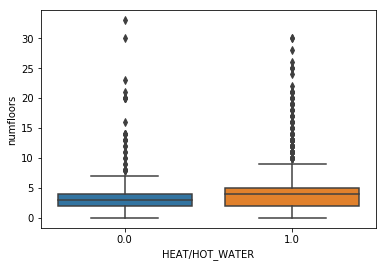

In [35]:
import seaborn as sns

sns.boxplot(x=merge_heat["HEAT/HOT_WATER"],y=merge_heat["numfloors"])

We see that the top 7 features are:

- xcoord
- ycoord
- years_built
- bldgarea
- bldgdepth
- resarea
- lotdepth


### Concluding Remarks

Given this, the features that are shared at least in two of the methods used:

- xcoord
- ycoord
- bldgdepth
- years_built
- numfloors
- resarea
- bldgarea
- residfar
- lotdepth

### Additional Insights

#### We see that the main feature is numfloors. This may be also an indicator of houses within the same building using the same Heat/Hot Water system that can be causing more problems when the house is bigger but the system used is for less floors.